In [487]:
import plotly
import pandas as pd
import numpy as np
from pathlib import Path
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline
from IPython.core.display import HTML
import statsmodels.api as sm
import statsmodels.formula.api as smf
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import numpy as np
import os
import chart_studio
import itertools
from collections import Counter
import plotly.graph_objects as Go

In [488]:
path_to_download_folder = str(os.path.join(Path.home(), "Downloads"))

In [489]:
admit = pd.read_csv(os.path.join(path_to_download_folder, "Admit.csv"))
patients = pd.read_csv(os.path.join(path_to_download_folder, "Patient.csv"))
diagnosis = pd.read_csv(os.path.join(path_to_download_folder, "Diagnosis (2).csv"))

Check to find the top 15 most common reasons for ER admission.

In [490]:
admits = admit['diagnosis'].value_counts()

In [491]:
admits.head(15)

NEWBORN                                                      7823
PNEUMONIA                                                    1566
SEPSIS                                                       1184
CONGESTIVE HEART FAILURE                                      928
CORONARY ARTERY DISEASE                                       840
CHEST PAIN                                                    778
INTRACRANIAL HEMORRHAGE                                       713
ALTERED MENTAL STATUS                                         712
GASTROINTESTINAL BLEED                                        686
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA     583
UPPER GI BLEED                                                580
ABDOMINAL PAIN                                                554
FEVER                                                         510
DIABETIC KETOACIDOSIS                                         462
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT/SDA      450
Name: diag

In [492]:
admit['ethnicity'].value_counts()

WHITE                                                       40996
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85
WHITE - OT

Take a look at the top admit reasons for each race.

In [493]:
def ethnicity_admit(admit, ethnicity):
    ethnicity = admit[admit['ethnicity'] ==  ethnicity].groupby(['diagnosis']).size()
    ethnicity = ethnicity.reset_index()
    ethnicity["Percentage"] = ethnicity[0]/ethnicity[0].sum()
    ethnicity = ethnicity.sort_values(by = "Percentage", ascending= False).head(5)
    
    return(ethnicity)


In [494]:
ethnicity_admit(admit, 'WHITE')

diagnosis     0  Percentage
7683                    NEWBORN  4755    0.116046
8365                  PNEUMONIA  1166    0.028456
10149                    SEPSIS   864    0.021086
3113   CONGESTIVE HEART FAILURE   614    0.014985
2522                 CHEST PAIN   575    0.014033

In [495]:
ethnicity_admit(admit, "BLACK/AFRICAN AMERICAN")

diagnosis    0  Percentage
1151                   NEWBORN  865    0.159037
419   CONGESTIVE HEART FAILURE  176    0.032359
499      DIABETIC KETOACIDOSIS  165    0.030336
1234                 PNEUMONIA  164    0.030153
1504                    SEPSIS  137    0.025188

In [496]:
ethnicity_admit(admit, "ASIAN")

diagnosis    0  Percentage
318                  NEWBORN  715    0.474453
339                PNEUMONIA   38    0.025216
217       HYPERBILIRUBINEMIA   31    0.020571
408                   SEPSIS   19    0.012608
247  INTRACRANIAL HEMORRHAGE   15    0.009954

In [497]:
ethnicity_admit(admit, "UNKNOWN/NOT SPECIFIED")

diagnosis    0  Percentage
1183                                            NEWBORN  437    0.096639
555                             CORONARY ARTERY DISEASE  185    0.040911
625   CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...  115    0.025431
433                                     CHEST PAIN\CATH   71    0.015701
616                        CORONARY ARTERY DISEASE\CATH   68    0.015038

Looking at the top 15 diseases by length of stay (in days).

In [498]:
admit['staylength']= pd.to_datetime(admit['dischtime']) - pd.to_datetime(admit['admittime'])

In [499]:
admit['staylength'] = pd.to_timedelta(admit.staylength).dt.total_seconds()
# Convert seconds to days
admit['staylength'] = admit['staylength']/(24*60*60)

In [500]:
average_stay = admit[['staylength', 'diagnosis']].groupby(['diagnosis']).mean()
average_stay.sort_values(by = 'staylength', ascending  = False).head(15)

staylength
diagnosis                                                     
CROHN'S DISEASE;ABDOMINAL FISTULA                   294.660417
ASPIRATION; FAILURE TO THRIVE                       191.422917
CHRONIC LYMPHOCYTIC LEUKEMIA\BONE MARROW TRANSP...  169.187500
L THIGH FLUID COLLECTION                            166.906944
AMC;FEVER                                           164.365972
S/P LIVER TX-NAUSEA-VOMITING                        137.965278
APLASTIC ANEMIA;PANCYTOPENIA                        137.891667
PULMONARY EMBOLISM;SUBDURAL HEMATOMA                131.970833
ACUTE MYELOGENOUS LEUKEMIA;CHEMOTHERAPY             129.960417
MULTIPLE MYELOMA;FEVER;NEUTROPENIA                  129.035417
MYELODYSPLASIA;BONE MARROW TRANSPLANT/SDA           126.270833
RT CEREBELLAR BLEED                                 125.489583
FACIAL NUMBNESS                                     123.984722
LARGE ABDOMINAL FISTULA                             123.687500
ELEVATED WHITE BLOOD COUNT                          118.701389

Load in the diagnosis data and look at the primary diagnoses.

In [501]:
diagnosis = pd.read_csv(os.path.join(path_to_download_folder, "diagnosis.csv"))

In [502]:
primary_diag = diagnosis[diagnosis['seq_num']==1]

Merge admit data with patient data.

In [503]:
merged_data = admit.merge(patients, on= 'subject_id', how='inner')

In [504]:
admit['ethnicity'].value_counts()

WHITE                                                       40996
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85
WHITE - OT

Admission location is the best predictor of time of stay. 

In [505]:
results = smf.ols('staylength ~ admission_location', data=admit).fit()


In [506]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             staylength   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     75.40
Date:                Thu, 29 Oct 2020   Prob (F-statistic):          2.16e-124
Time:                        00:19:54   Log-Likelihood:            -2.3214e+05
No. Observations:               58976   AIC:                         4.643e+05
Df Residuals:                   58967   BIC:                         4.644e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                           5.5729      0.868      6.422      0.000       3.872       7.274
admission_location[T.CLINIC REFERRAL/PREMATURE]     5.8818      0.875      6.721      0.000       4.167       7.597
admission_location[T.EMERGENCY ROOM ADMIT]          4.2417      0.872      4.866      0.000       2.533       5.950
admission_location[T.HMO REFERRAL/SICK]            -0.0417      1.503     -0.028      0.978      -2.988       2.904
admission_location[T.PHYS REFERRAL/NORMAL DELI]     3.1160      0.874      3.567      0.000       1.404       4.828
admission_location[T.TRANSFER FROM HOSP/EXTRAM]     6.1840      0.878      7.042      0.000       4.463       7.905
admission_location[T.TRANSFER FROM OTHER HEALT]    15.7663      1.708      9.232      0.000      12.419      19.114
admission_location[T.TRANSFER FROM SKILLED NUR]     4.8569      1.147      4.234      0.000       2.609       7.105
admission_location[T.TRSF WITHIN THIS FACILITY]    -2.5303      5.610     -0.451      0.652     -13.527       8.466
==============================================================================
Omnibus:                    56007.654   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3260026.503
Skew:                           4.558   Prob(JB):                         0.00
Kurtosis:                      38.264   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [507]:
merged_data['dob'] = pd.to_datetime(merged_data['dob']).dt.date
merged_data['admittime'] = pd.to_datetime(merged_data['admittime']).dt.date
merged_data['age'] = merged_data.apply(lambda e: (e['admittime'] - e['dob']).days/365, axis=1)
merged_data['age'][merged_data['age']>300] = 89

<ipython-input-507-10d3dd7ed067>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [508]:
merged_data.head()

row_id_x  subject_id  hadm_id   admittime                dischtime  \
0        21          22   165315  2196-04-09  2196-04-10 15:54:00.000   
1        22          23   152223  2153-09-03  2153-09-08 19:10:00.000   
2        23          23   124321  2157-10-18  2157-10-25 14:00:00.000   
3        24          24   161859  2139-06-06  2139-06-09 12:48:00.000   
4        25          25   129635  2160-11-02  2160-11-05 14:55:00.000   

  deathtime admission_type         admission_location  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          discharge_location insurance  ... has_chartevents_data staylength  \
0  DISC-TRAN CANCER/CHLDRN H   Private  ...                    1   1.144444   
1           HOME HEALTH CARE  Medicare  ...                    1   5.496528   
2           HOME HEALTH CARE  Medicare  ...                    1   6.768056   
3                       HOME   Private  ...                    1   2.856944   
4                       HOME   Private  ...                    1   3.534028   

  row_id_y gender         dob  dod dod_hosp  dod_ssn  expire_flag        age  
0       19      F  2131-05-07  NaN      NaN      NaN            0  64.969863  
1       20      M  2082-07-17  NaN      NaN      NaN            0  71.178082  
2       20      M  2082-07-17  NaN      NaN      NaN            0  75.304110  
3       21      M  2100-05-31  NaN      NaN      NaN            0  39.041096  
4       22      M  2101-11-21  NaN      NaN      NaN            0  58.989041  

[5 rows x 28 columns]

In [509]:
age_results = smf.ols('staylength ~ age*expire_flag + gender + admission_type', data=merged_data).fit()

In [510]:
age_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             staylength   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     108.9
Date:                Thu, 29 Oct 2020   Prob (F-statistic):          2.66e-159
Time:                        00:19:55   Log-Likelihood:            -2.3206e+05
No. Observations:               58976   AIC:                         4.641e+05
Df Residuals:                   58968   BIC:                         4.642e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       8.9342      0.292     30.577      0.000       8.361       9.507
gender[T.M]                     0.1446      0.103      1.405      0.160      -0.057       0.346
admission_type[T.EMERGENCY]     0.7776      0.155      5.011      0.000       0.473       1.082
admission_type[T.NEWBORN]       2.4515      0.315      7.788      0.000       1.835       3.068
admission_type[T.URGENT]        2.8812      0.368      7.830      0.000       2.160       3.602
age                            -0.0125      0.004     -3.094      0.002      -0.020      -0.005
expire_flag                     6.2653      0.446     14.038      0.000       5.391       7.140
age:expire_flag                -0.0576      0.007     -8.758      0.000      -0.071      -0.045
==============================================================================
Omnibus:                    55219.209   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3126884.423
Skew:                           4.460   Prob(JB):                         0.00
Kurtosis:                      37.538   Cond. No.                         727.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Build graph to show hospital stay times by various demographics.

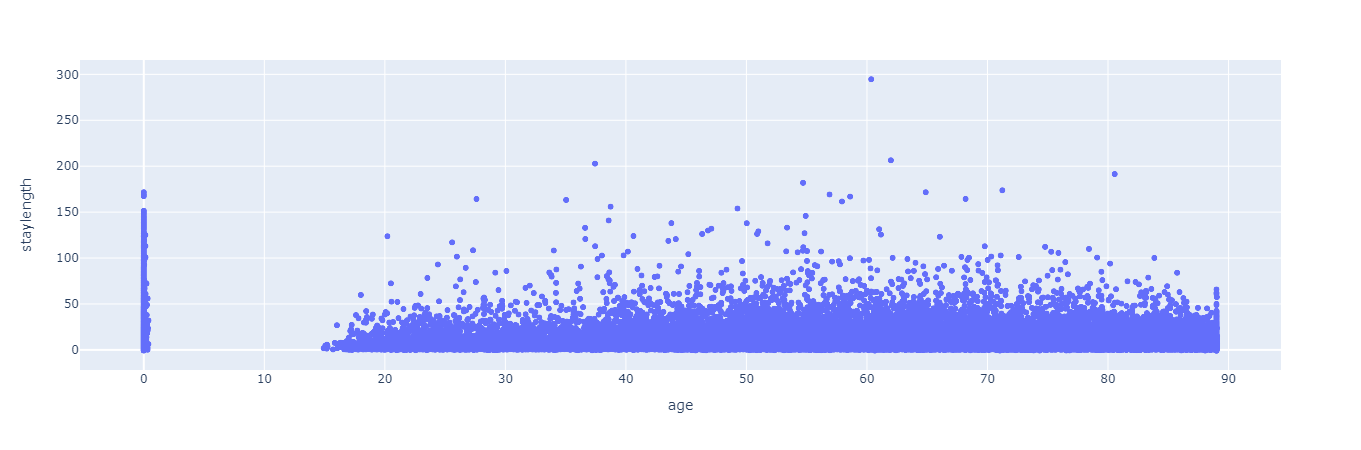

In [511]:
px.scatter(merged_data, 'age','staylength')

Most common primary diagnoses.

In [512]:
primary_diagnosis = diagnosis[diagnosis['seq_num']==1]

In [513]:
grouped = primary_diagnosis.groupby(by='short_title').size().reset_index(name='counts').sort_values(by='counts', ascending=False)[:15]

In [514]:
grouped.head()

short_title  counts
2325            Septicemia NOS    4578
731   Crnry athrscl natve vssl    4545
2342  Single lb in-hosp w/o cs    3697
158   Acute respiratry failure    3205
2341    Single lb in-hosp w cs    2810

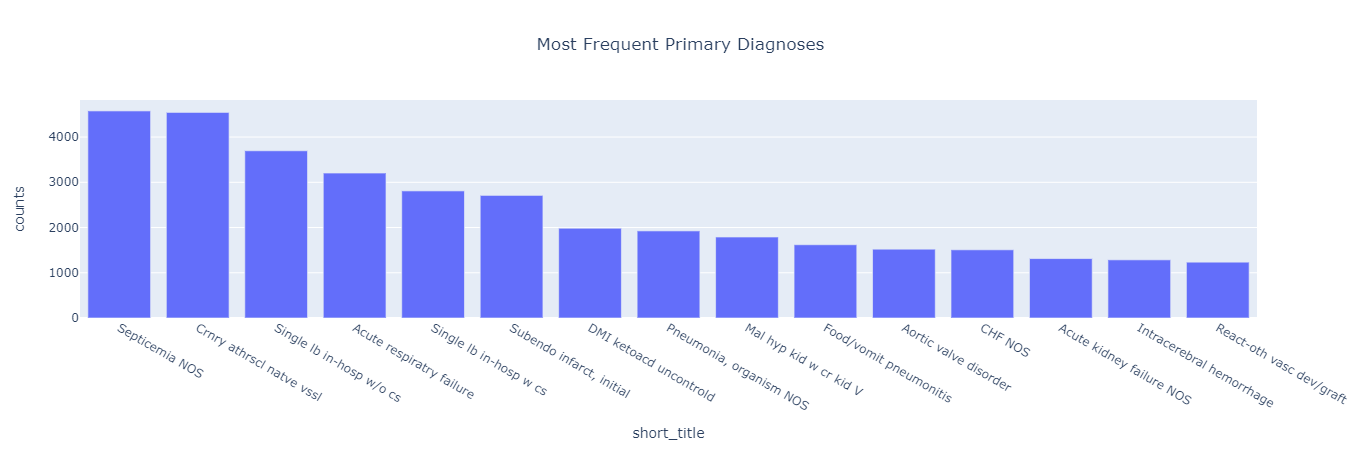

In [515]:
grad_bar = px.bar(grouped, 'short_title', 'counts', title = 'Most Frequent Primary Diagnoses')
grad_bar.update_layout(title_x = .5)
grad_bar.show()

Do different races have different ages?

In [516]:
age_race = merged_data.groupby(['ethnicity']).mean('age').reset_index().sort_values(by='age', ascending=False)

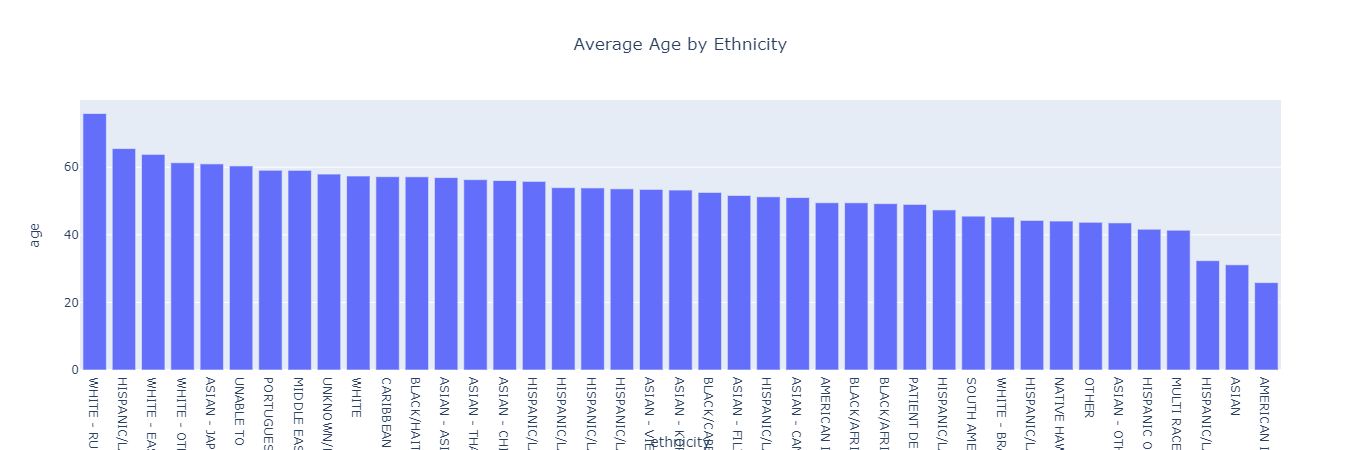

In [517]:
grad_bar = px.bar(age_race, 'ethnicity', 'age', title = 'Average Age by Ethnicity')
grad_bar.update_layout(title_x = .5)
grad_bar.show()

Do older people die at a higher rate?

In [518]:
death_age = merged_data.groupby(['expire_flag']).mean('age').reset_index()

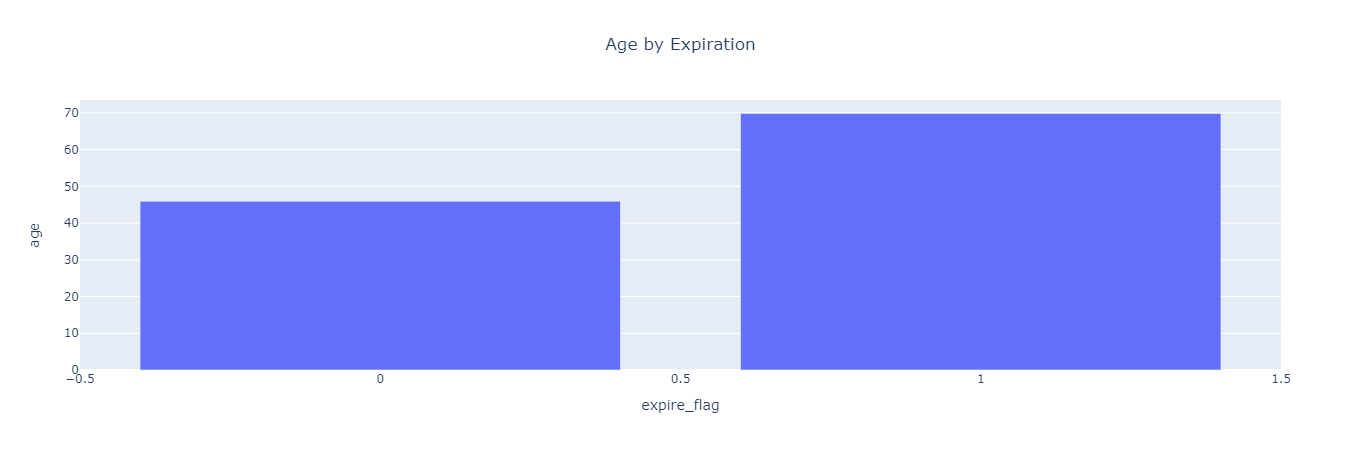

In [519]:
expire_bar = px.bar(death_age, 'expire_flag', 'age', title = 'Age by Expiration')
expire_bar.update_layout(title_x = .5)
expire_bar.show()

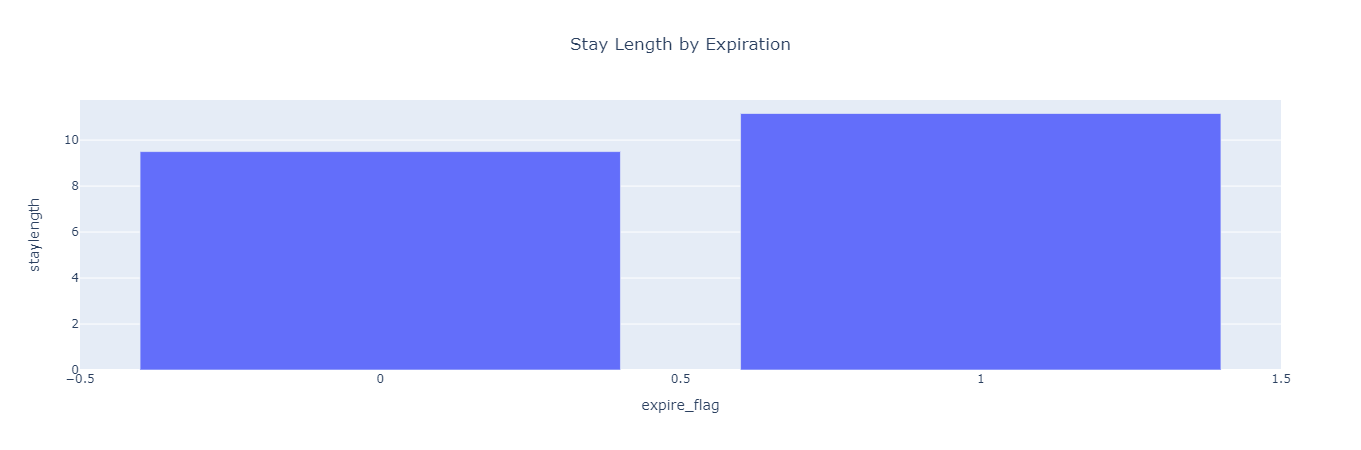

In [520]:
expire_bar = px.bar(death_age, 'expire_flag', 'staylength', title = 'Stay Length by Expiration')
expire_bar.update_layout(title_x = .5)
expire_bar.show()

In [521]:
diagnosis_matrix = diagnosis[['subject_id', 'short_title', 'seq_num']]

In [522]:
top15 = diagnosis_matrix['short_title'].value_counts()[:49].index.tolist()

Filter to only get the top 15 diagnoses.

In [523]:
subset_matrix15 = diagnosis_matrix[diagnosis_matrix['short_title'].isin(top15)]

In [524]:
subset_matrix15 = subset_matrix15.groupby('subject_id')['short_title'].apply(','.join).reset_index()

In [525]:
diagnosis_list15 = subset_matrix15['short_title'].to_list()

In [526]:
text_data15 = []
for i in diagnosis_list15:
    text_data15.append(i.split(','))

In [527]:
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd
 
def gen_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        matrix[pos_current][pos_previous] = count
    matrix = np.matrix(matrix)
 
    # return the matrix and the index
    return matrix, vocab_index
 

In [528]:
# Create one list using many lists
data15 = list(itertools.chain.from_iterable(text_data15))
matrix15, vocab_index15 = gen_matrix(data15)
 

data_matrix15 = pd.DataFrame(matrix15, index=vocab_index15,
                             columns=vocab_index15)

In [529]:
sizes = data_matrix15.sum(axis=0).to_list()

In [530]:
import seaborn as sns; sns.set_theme()
import networkx as nx

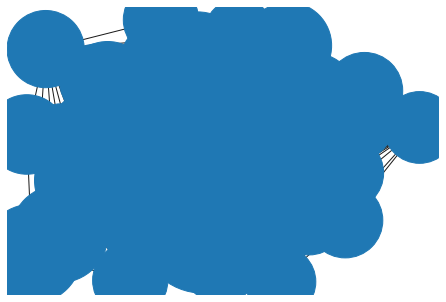

In [531]:
g15 =nx.from_numpy_matrix(data_matrix15.to_numpy())
nx.draw(g15, with_labels = False, node_size= sizes)

In [532]:
"""interim= data_matrix15.stack()
interim2= interim[interim >= 1].rename_axis(('source', 'target')).reset_index(name='weight')
"""

"interim= data_matrix15.stack()\ninterim2= interim[interim >= 1].rename_axis(('source', 'target')).reset_index(name='weight')\n"

In [533]:
"""g15 = nx.from_pandas_edgelist(interim2,  edge_attr=True)
nx.draw_networkx(g15)
"""

'g15 = nx.from_pandas_edgelist(interim2,  edge_attr=True)\nnx.draw_networkx(g15)\n'

In [534]:
pos= nx.fruchterman_reingold_layout(g15)
N = list(data_matrix15.columns)
Node = g15.nodes()
E = g15.edges()
labels= N

In [535]:
for n, p in pos.items():
    g15.nodes[n]['pos'] = p

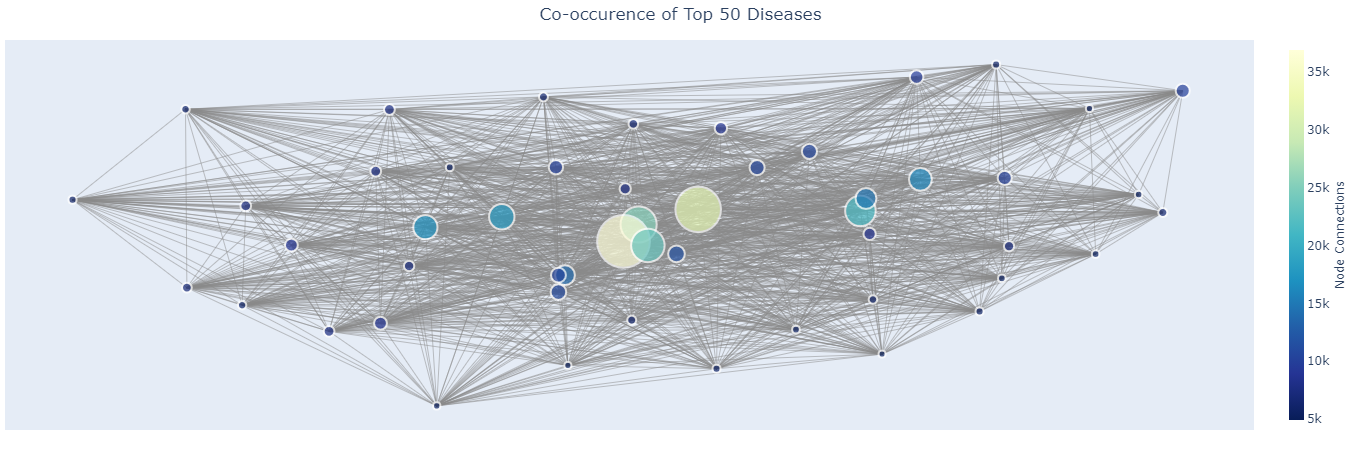

In [542]:
edge_x = []
edge_y = []
for edge in g15.edges():
    x0, y0 = g15.nodes[edge[0]]['pos']
    x1, y1 = g15.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in g15.nodes():
    x, y = g15.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
node_trace = Go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'greys' | 'YlgnBu' | 'greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlgnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_adjacencies = []
node_text = []
i=0
for node, adjacencies in enumerate(g15.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('Disease:' +str(labels[i]) +', Number of Connections: '+str(int(sizes[i])))
    i+=1

node_trace.marker.color = sizes
node_trace.marker.size = [s/700 for  s in sizes]
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
fig.update_layout(title = 'Co-occurence of Top 50 Diseases', title_x = .50)
fig.show()